In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp",
                                                                  "order_approved_at",
                                                                  "order_delivered_carrier_date",
                                                                  "order_delivered_customer_date",
                                                                  "order_estimated_delivery_date"
                                                                 ]).dropna(how="all")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [25]:
#Počet objednávek v jednotlivých měsících

df = df.assign(order_month = df.order_purchase_timestamp.dt.to_period("M"))

monthly_orders_df = pd.DataFrame(df.groupby("order_month")["order_id"].count())
monthly_orders_df

,order_id
order_month,
2016-09,4
2016-10,324
2016-12,1
2017-01,800
2017-02,1780
2017-03,2682
2017-04,2404
2017-05,3700
2017-06,3245


In [38]:
#Měsíc s největším počtem objednávek

monthly_orders_df.sort_values(by="order_id").tail(1)

,order_id
order_month,
2017-11,7544


In [60]:
# Meziroční změna 

month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}


df = df.assign(
    order_year = df["order_purchase_timestamp"].dt.year,
    order_month_num = df["order_purchase_timestamp"].dt.month
)

#Počet objednávek po roce a měsíci
monthly_counts = (
    df.groupby(["order_year", "order_month_num"])["order_id"]
    .count()
    .reset_index(name="order_count")
)

#Spojení měsíců z různých let
pivot = monthly_counts.pivot(
    index="order_month_num",
    columns="order_year",
    values="order_count"
)
pivot = pivot.rename(index=month_names)

#Výpočet meziroční změny
pivot["YoY_change_%"] = (
    (pivot[2018] - pivot[2017]) / pivot[2017] * 100
).round(2)

pivot

order_year,2016,2017,2018,YoY_change_%
order_month_num,,,,
January,NaN,800.0,7269.0,808.62
February,NaN,1780.0,6728.0,277.98
March,NaN,2682.0,7211.0,168.87
April,NaN,2404.0,6939.0,188.64
May,NaN,3700.0,6873.0,85.76
June,NaN,3245.0,6167.0,90.05
July,NaN,4026.0,6292.0,56.28
August,NaN,4331.0,6512.0,50.36
September,4.0,4285.0,16.0,-99.63


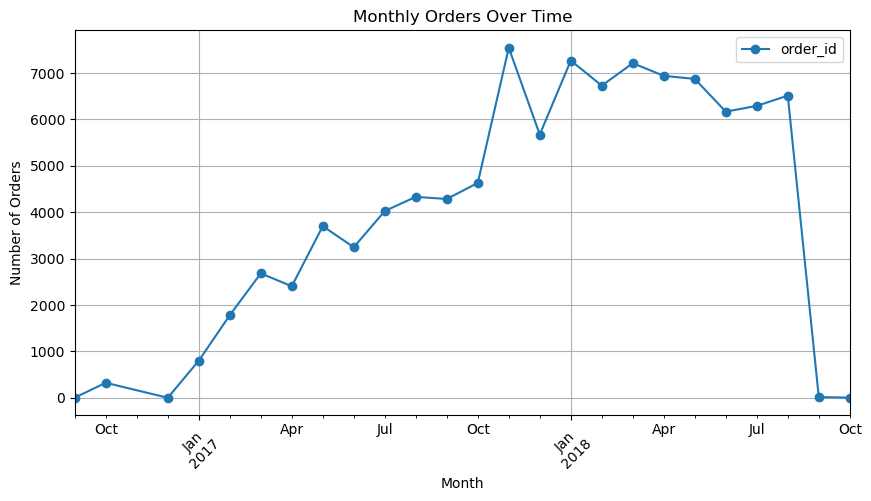

In [68]:
#Vizualizace

monthly_orders_df.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Orders Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

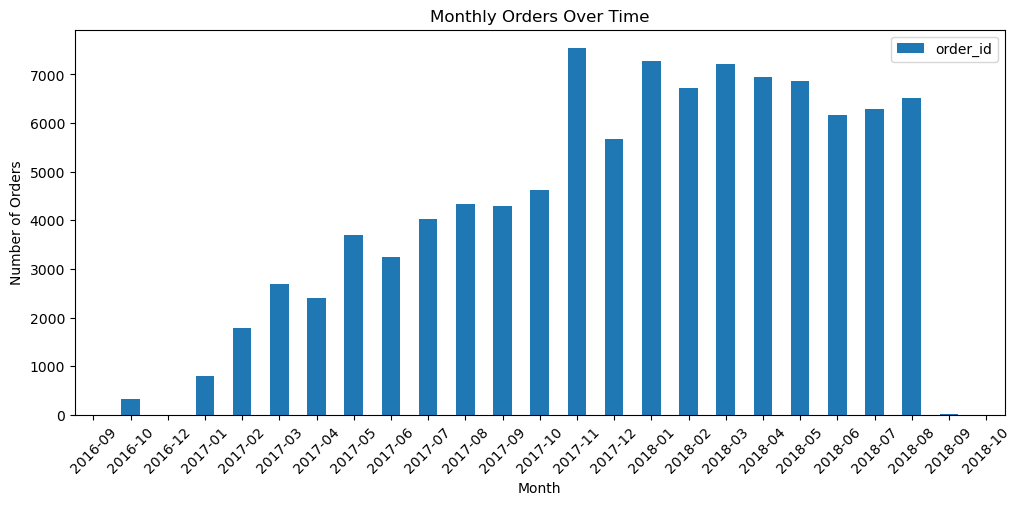

In [70]:
monthly_orders_df.plot(kind="bar", figsize=(12,5))
plt.title("Monthly Orders Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()